## Final Project
### Effect of Stellar Mass on Planetary Multiplicity

CS-GY 6053 – Foundations of Data Science
<br><br> Claire Hattaway, Chiranjeev Kumar, Hyun Sang Ryu, Raunak Ahmed
***

**Question/Estimand**
<ul>How does stellar mass influence the number of planets that a star hosts in its solar system (planetary multiplicity)?</ul>

**Data Description**
<ul>Data Source: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=STELLARHOSTS</ul>
<ul>Description: The dataset is hosted by NASA’s Exoplanet Archive with rows representing stars that are solar hosts in a solar system. Within the dataset, there are columns present that cover the necessary information needed to account for our treatment, outcome and confound variables. Column name descriptions and a sample of the data is provided below.
<ul><li>sy_name: Name of solar system</li>
<li>hostname: Name of host star in the system</li>
<li>sy_pnum: Number of planets in the system</li>
<li>st_teff: Stellar effective temperature (Kelvin)</li>
<li>st_mass: Stellar mass</li>
<li>st_met: Stellar metallicity</li></ul></ul>

In [3]:
import pandas as pd

df = pd.read_csv('data.csv')
print(df.head())

  sy_name   hostname  sy_pnum Stellar Parameter Reference  st_teff  st_mass   
0  14 Her     14 Her        2                       TICv8   5280.0     0.91  \
1  16 Cyg  HIP 96895        1                       TICv8   5778.0     1.04   
2  16 Cyg   16 Cyg B        1                       TICv8   5747.0     1.03   
3  47 UMa     47 UMa        3                       TICv8   5872.0     1.06   
4  51 Peg     51 Peg        1                       TICv8   5758.0     1.03   

   st_met st_metratio  
0    0.40       [M/H]  
1    0.09       [M/H]  
2    0.06       [M/H]  
3    0.04       [M/H]  
4    0.18       [M/H]  


**Causal Model**
<br>Variables:
<ul><li>Treatment (T): Stellar mass- calculated mass of a star</li>
<li>Outcome (Y): Number of planets- the number of planets hosted by a solar system</li>
<li>Confound 1 (E): Stellar effective temperature- measure of star’s surface temperature, using luminosity and radius</li>
<li>Confound 2 (M): Stellar metallicity- abundance of elements in a star that is heavier than helium and hydrogen</li></ul>

![DAG](DAG.png)

**How do the variables interact with one another?**
<ul><li>Stellar metallicity: Higher metallicity ratios lead stars to have cooler temperatures and lose more mass over time than stars with lower metallicity. Additionally, higher metallicty ratios increase the amount of solid material available for planet formation, tending to yield a greater number of planets in a system.</li>
<li>Stellar mass: An increase in stellar mass increases the star's effective temperature, due to the increased gravitational pressure. Planetary multiplicity also decreases with increased stellar mass.</li>
<li> Stellar effective temperature: Similar to stellar mass, increasing stellar effect temperatures tends to decrease the number of planets in the system.</li></ul>

References:
https://burro.case.edu/Academics/Astr222/Galaxy/Structure/metals.html#:~:text=Line%20blanketing:%20lots%20of%20metals,them%20cooler%20(redder)%20temperatures.
<br>https://public.nrao.edu/ask/does-metallicity-affect-the-evolution-of-a-star/#:~:text=The%20abundance%20of%20elements%20heavier,supernova%20and%20a%20black%20hole.
<br>https://iopscience.iop.org/article/10.3847/1538-4357/ab0205/pdf#:~:text=The%20whole%20sample%20is%20unevenly,planets%20to%20compute%20the%20tracers.&text=metallicities%2C%20but%20these%20systems%20were,tonically%20increasing%20with%20stellar%20metallicity.&text=reflects%20the%20final%20outcome%20of,directly%20the%20planet%20formation%20efficiency.
<br>https://iopscience.iop.org/article/10.3847/1538-3881/ab7373/pdf#:~:text=The%20Kepler%20mission%20has%20discovered,%CE%94AIC%EF%82%A0%E2%88%BC%EF%82%A05




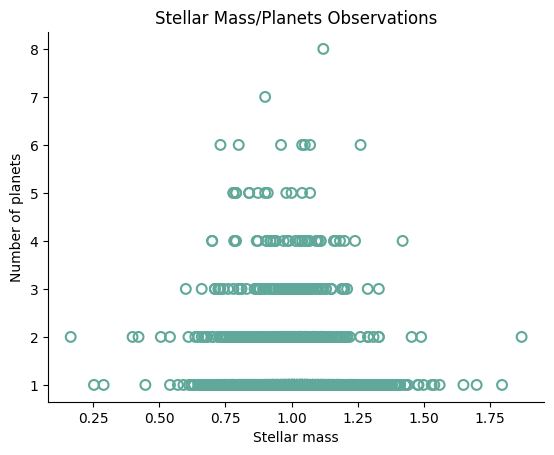

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initial plot of data
sns.scatterplot(x=df.st_mass, y=df.sy_pnum, edgecolor='#60a899', facecolor='none', s=50, linewidth=1.5)
plt.xlabel("Stellar mass")
plt.ylabel("Number of planets")
plt.title('Stellar Mass/Planets Observations')
sns.despine()